# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [2]:
env_file_name = '/home/m2keyofz/Downloads/VisualBanana_Linux/Banana.x86_64'
# env = UnityEnvironment(file_name=env_file_name)

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [3]:
########################################################################
#                                                                      #
# This code is adapted from yingweiy's excellent GitHub repo:          #
#   https://github.com/yingweiy/drlnd_project1_navigation.git          #
#                                                                      #
########################################################################

class BananaEnv():
    def __init__(self, env_file_name):
        self.env  = UnityEnvironment(file_name=env_file_name)
        
        self.brain_name  = self.env.brain_names[0]
        self.brain       = self.env.brains[self.brain_name]
        self.action_size = self.brain.vector_action_space_size

        self.last_frame  = None
        self.last2_frame = None
        self.last3_frame = None

        self.reset()
        self.state_size  = self.state.shape

    def get_state(self):
        # Convert from HeightxWidthxChannels to ChannelsxHeightxWidth
        frame = np.transpose(self.env_info.visual_observations[0], (0,3,1,2))[:,:,:,:]
        frame_size = frame.shape  # 1,3,84,84
        
        nframes = 4
        self.state = np.zeros((1, frame_size[1], nframes, frame_size[2], frame_size[3]))
        self.state[0, :, 0, :, :] = frame
        if not(self.last_frame is None):
            self.state[0, :, 1, :, :] = self.last_frame
        if not(self.last2_frame is None):
            self.state[0, :, 2, :, :] = self.last2_frame
        if not (self.last3_frame is None):
            self.state[0, :, 3, :, :] = self.last3_frame
        self.last3_frame = self.last2_frame
        self.last2_frame = self.last_frame
        self.last_frame  = frame

    def reset(self):
        self.env_info = self.env.reset(train_mode=True)[self.brain_name]
        self.get_state()
        return self.state

    def render(self):
        pass

    def step(self, action):
        self.env_info = self.env.step(action)[self.brain_name]
        self.get_state()
        reward = self.env_info.rewards[0]
        done   = self.env_info.local_done[0]
        return self.state, reward, done, None

    def close(self):
        self.env.close()

In [4]:
from dqn import DQN

env_file_name = '/home/m2keyofz/Downloads/VisualBanana_Linux/Banana.x86_64'
env = BananaEnv(env_file_name)
dqn = DQN(env.state_size, env.action_size, env)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
N_EPISODES = 1500

scores, averages = dqn.train(n_episodes=N_EPISODES, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)
np.save('VisualBanana_Scores.npy', np.array(scores))
                             
# Episode 1000	Average Score: 11.17    Elapsed: 284.81 mins.
# 
# Episode 100	Average Score:  0.28  	Elapsed: 27.60 mins.
# Episode 200	Average Score:  0.86  	Elapsed: 55.65 mins.
# Episode 300	Average Score:  2.49  	Elapsed: 83.87 mins.
# Episode 400	Average Score:  4.55  	Elapsed: 112.05 mins.
# Episode 500	Average Score:  7.46  	Elapsed: 140.93 mins.
# Episode 600	Average Score:  8.87  	Elapsed: 169.00 mins.
# Episode 700	Average Score: 9.970  	Elapsed: 197.32 mins.
# Episode 800	Average Score: 9.999  	Elapsed: 225.73 mins.
# Episode 900	Average Score: 12.15  	Elapsed: 254.13 mins.
# Episode 1000	Average Score: 12.47  	Elapsed: 282.57 mins.
# Episode 1030	Average Score: 12.96  
#     
# Environment solved in 931 episodes!	Average Score: 13.01
# ~28GB RAM Usage!

Episode 100	Average Score: 0.28
	Elapsed: 28.32 mins.
Episode 200	Average Score: 0.86
	Elapsed: 57.22 mins.

*** TOTAL ELAPSED: 57.22 mins. ***


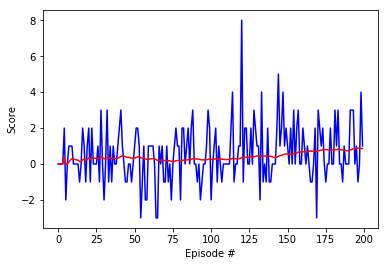

In [6]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores,   c='blue', label='DQN')
plt.plot(np.arange(len(scores)), averages, c='red',  label='Moving AVG')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
env.close()